In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X,y = make_blobs(n_samples=500,n_features=2,centers = 5,random_state=20)

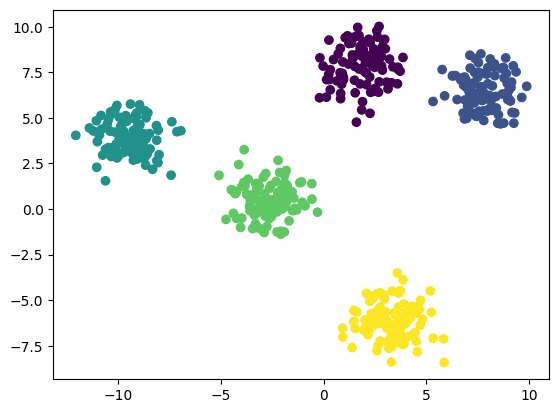

In [3]:
plt.scatter(X[:,0],X[:,1],c = y)
plt.show()

In [4]:
def initialize_cluster(k = 2,n_features = 2,min = -10,max = 10):
    clusters = []
    for i in range(k):
        cluster = {}
        cluster['center'] = (max-min)*np.random.rand(n_features)+min
        cluster['points'] = []
        clusters.append(cluster)
    return clusters

In [5]:
clusters = initialize_cluster(5,2,np.array([-10,-7.5]),np.array([10,10]))
clusters

[{'center': array([0.39298986, 2.89466086]), 'points': []},
 {'center': array([-1.37534798,  0.34308807]), 'points': []},
 {'center': array([-9.5041299 , -4.81721587]), 'points': []},
 {'center': array([-9.03679724,  1.42360363]), 'points': []},
 {'center': array([7.66115713, 2.58614301]), 'points': []}]

In [6]:
def distance(p1,p2):
    return np.sqrt(np.sum((p2-p1)**2))

In [7]:
def assign_points(X,clusters):
    for i in range(X.shape[0]):
        dist = []
        for c in clusters:
            dist.append(distance(X[i],c['center']))

        clusters[np.argmin(dist)]['points'].append(X[i])

In [8]:
assign_points(X,clusters)
clusters

[{'center': array([0.39298986, 2.89466086]),
  'points': [array([2.05217517, 7.48406522]),
   array([2.25605326, 5.24990931]),
   array([0.80040004, 7.47182365]),
   array([2.10074237, 8.06333734]),
   array([3.85728136, 8.31370355]),
   array([1.77384736, 6.86484509]),
   array([2.24093253, 7.23908406]),
   array([0.87712287, 6.84969507]),
   array([2.37253382, 7.8770468 ]),
   array([2.66607902, 6.40911521]),
   array([2.85450263, 8.88886541]),
   array([2.11110489, 8.40339271]),
   array([-0.02355261,  7.84261726]),
   array([1.89139437, 5.88732584]),
   array([2.28968574, 6.40317382]),
   array([0.82370553, 6.05281051]),
   array([0.93392325, 8.06832216]),
   array([3.12912175, 6.59105457]),
   array([1.72143588, 7.68394766]),
   array([2.70208537, 6.97579352]),
   array([1.20743022, 7.95578312]),
   array([1.98127374, 7.5613926 ]),
   array([2.08607703, 7.46086368]),
   array([0.90784053, 7.44112945]),
   array([3.62547116, 7.65904408]),
   array([1.65680297, 9.96417617]),
   arra

In [9]:
def plot_clusters(clusters):
    for cluster in clusters:
        if len(cluster['points']) != 0:
            p = np.array(cluster['points'])
            plt.scatter(p[:,0],p[:,1])
        c = cluster['center']
        plt.scatter(c[0],c[1],c = 'black')
    plt.show()

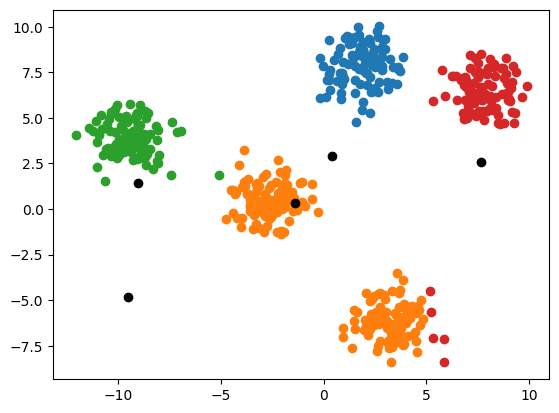

In [10]:
plot_clusters(clusters)

In [11]:
def update_clusters(clusters):
    is_updated = False
    for cluster in clusters:
        if len(cluster['points']) != 0:
            new_center = np.mean(cluster['points'],axis = 0)
            if np.any(new_center != cluster['center']):
                is_updated = True
                cluster['center'] = new_center
            
            cluster['points'] = []
    return is_updated

In [12]:
# np.array([1,2,3]) == np.array([3,2,3])

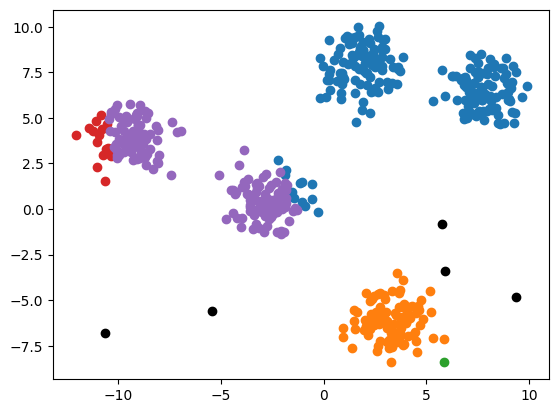

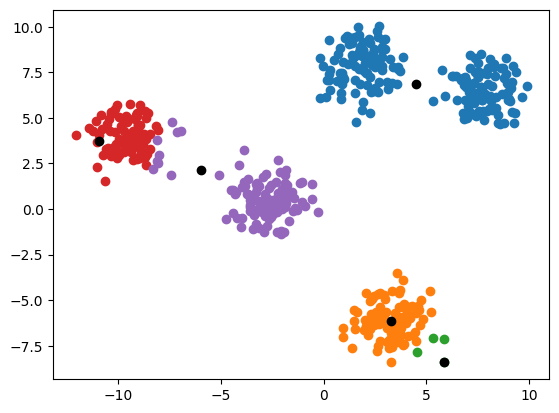

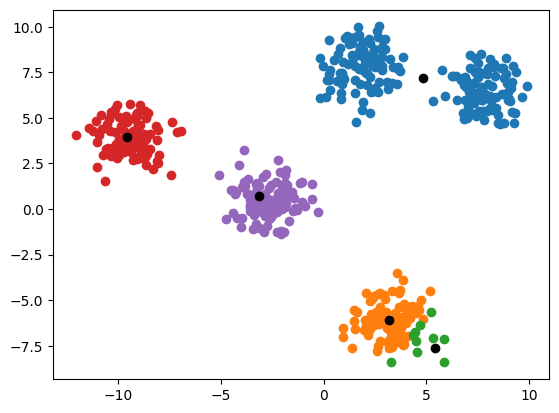

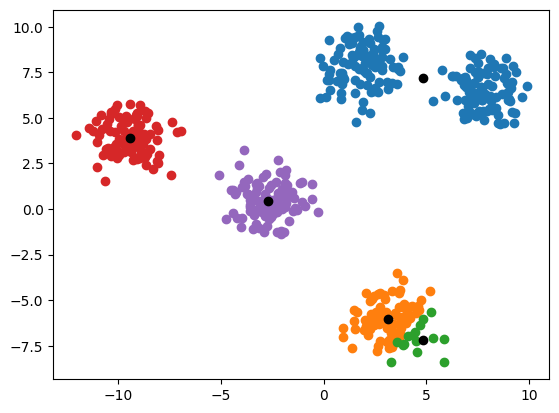

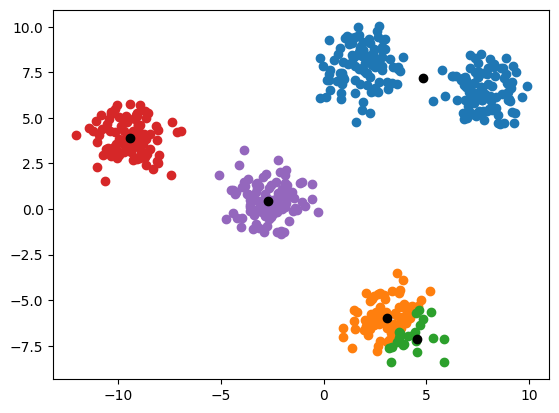

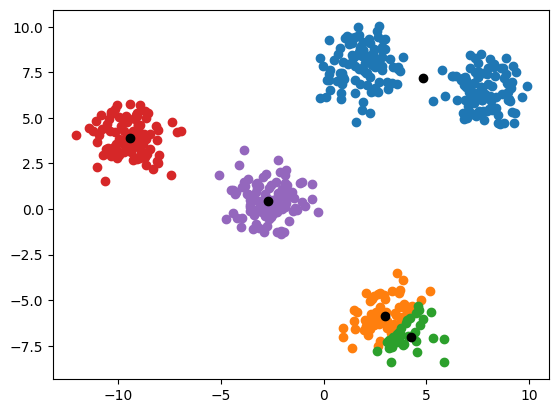

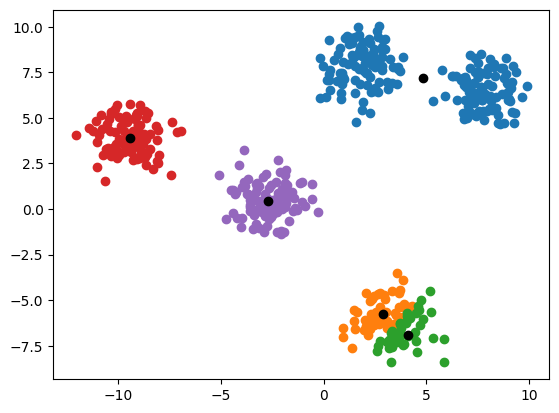

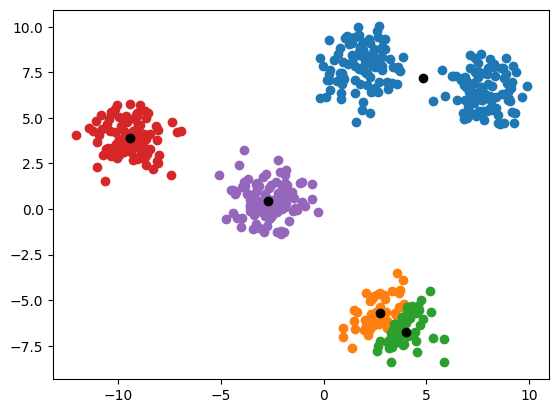

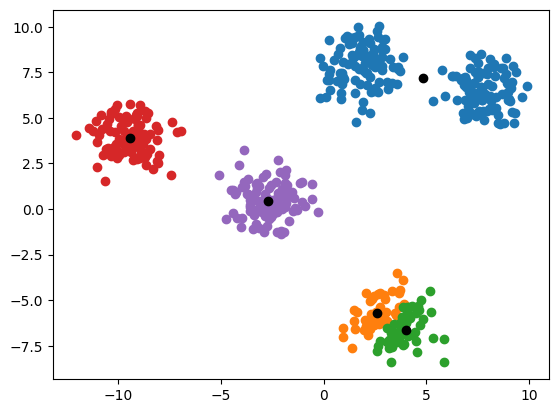

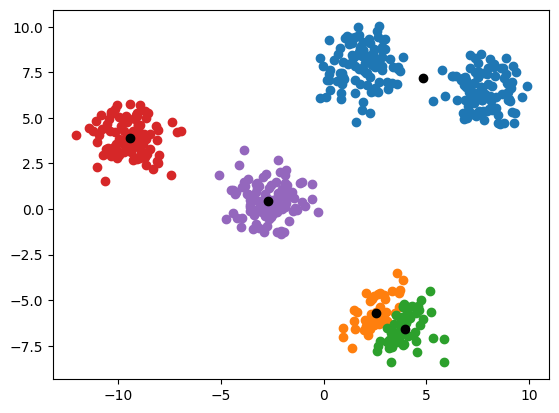

In [24]:
clusters = initialize_cluster(k = 5,n_features=2,min = np.min(X,axis = 0),max = np.max(X,axis = 0))
for i in range(10):
    assign_points(X,clusters)
    plot_clusters(clusters)
    is_updated = update_clusters(clusters)
    if is_updated == False:
        break

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [16]:
clf = KMeans(n_clusters=5)

In [17]:
clf.fit(X)

KMeans(n_clusters=5)

In [18]:
clf.inertia_

944.4282081113831

In [19]:
clf.cluster_centers_

array([[ 3.28857717, -6.15519417],
       [-9.41045484,  3.90984505],
       [ 7.78664491,  6.45659035],
       [-2.70399202,  0.46108905],
       [ 1.86103043,  7.92313022]])

In [35]:
# clf.predict(X)

In [20]:
sil = []
wcss = []
for i in range(2,10):
    clf = KMeans(n_clusters=i)
    clf.fit(X)
    wcss.append(clf.inertia_)
    sil.append(silhouette_score(X,clf.predict(X)))

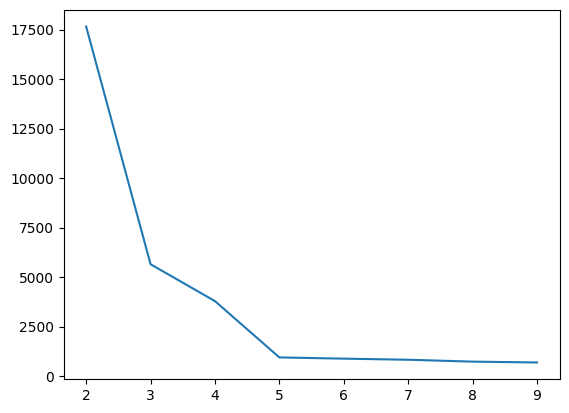

In [21]:
plt.plot([i for i in range(2,10)],wcss)

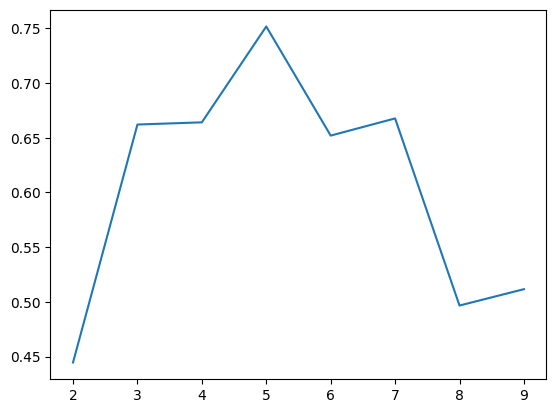

In [22]:
plt.plot([i for i in range(2,10)],sil)

In [ ]:
clf